# Wine Classification

In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Loading wine data from scikit learn datasets

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

Checking the loaded data to find the details

In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
df1 = pd.DataFrame(wine.data, columns = wine.feature_names)
df2 = pd.DataFrame(wine.target, columns = ['target'])

df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target

## Knowing the data

Exploring the data to get the basic idea. To also find if there are any false or null values to work on.

In [7]:
df1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


In [11]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [12]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

The data is not evenly divided in three classes of same size. The output labels are 0,1,2

## Plotting the data

The best way to exlpore the data is to visualize it in the form of graphs.

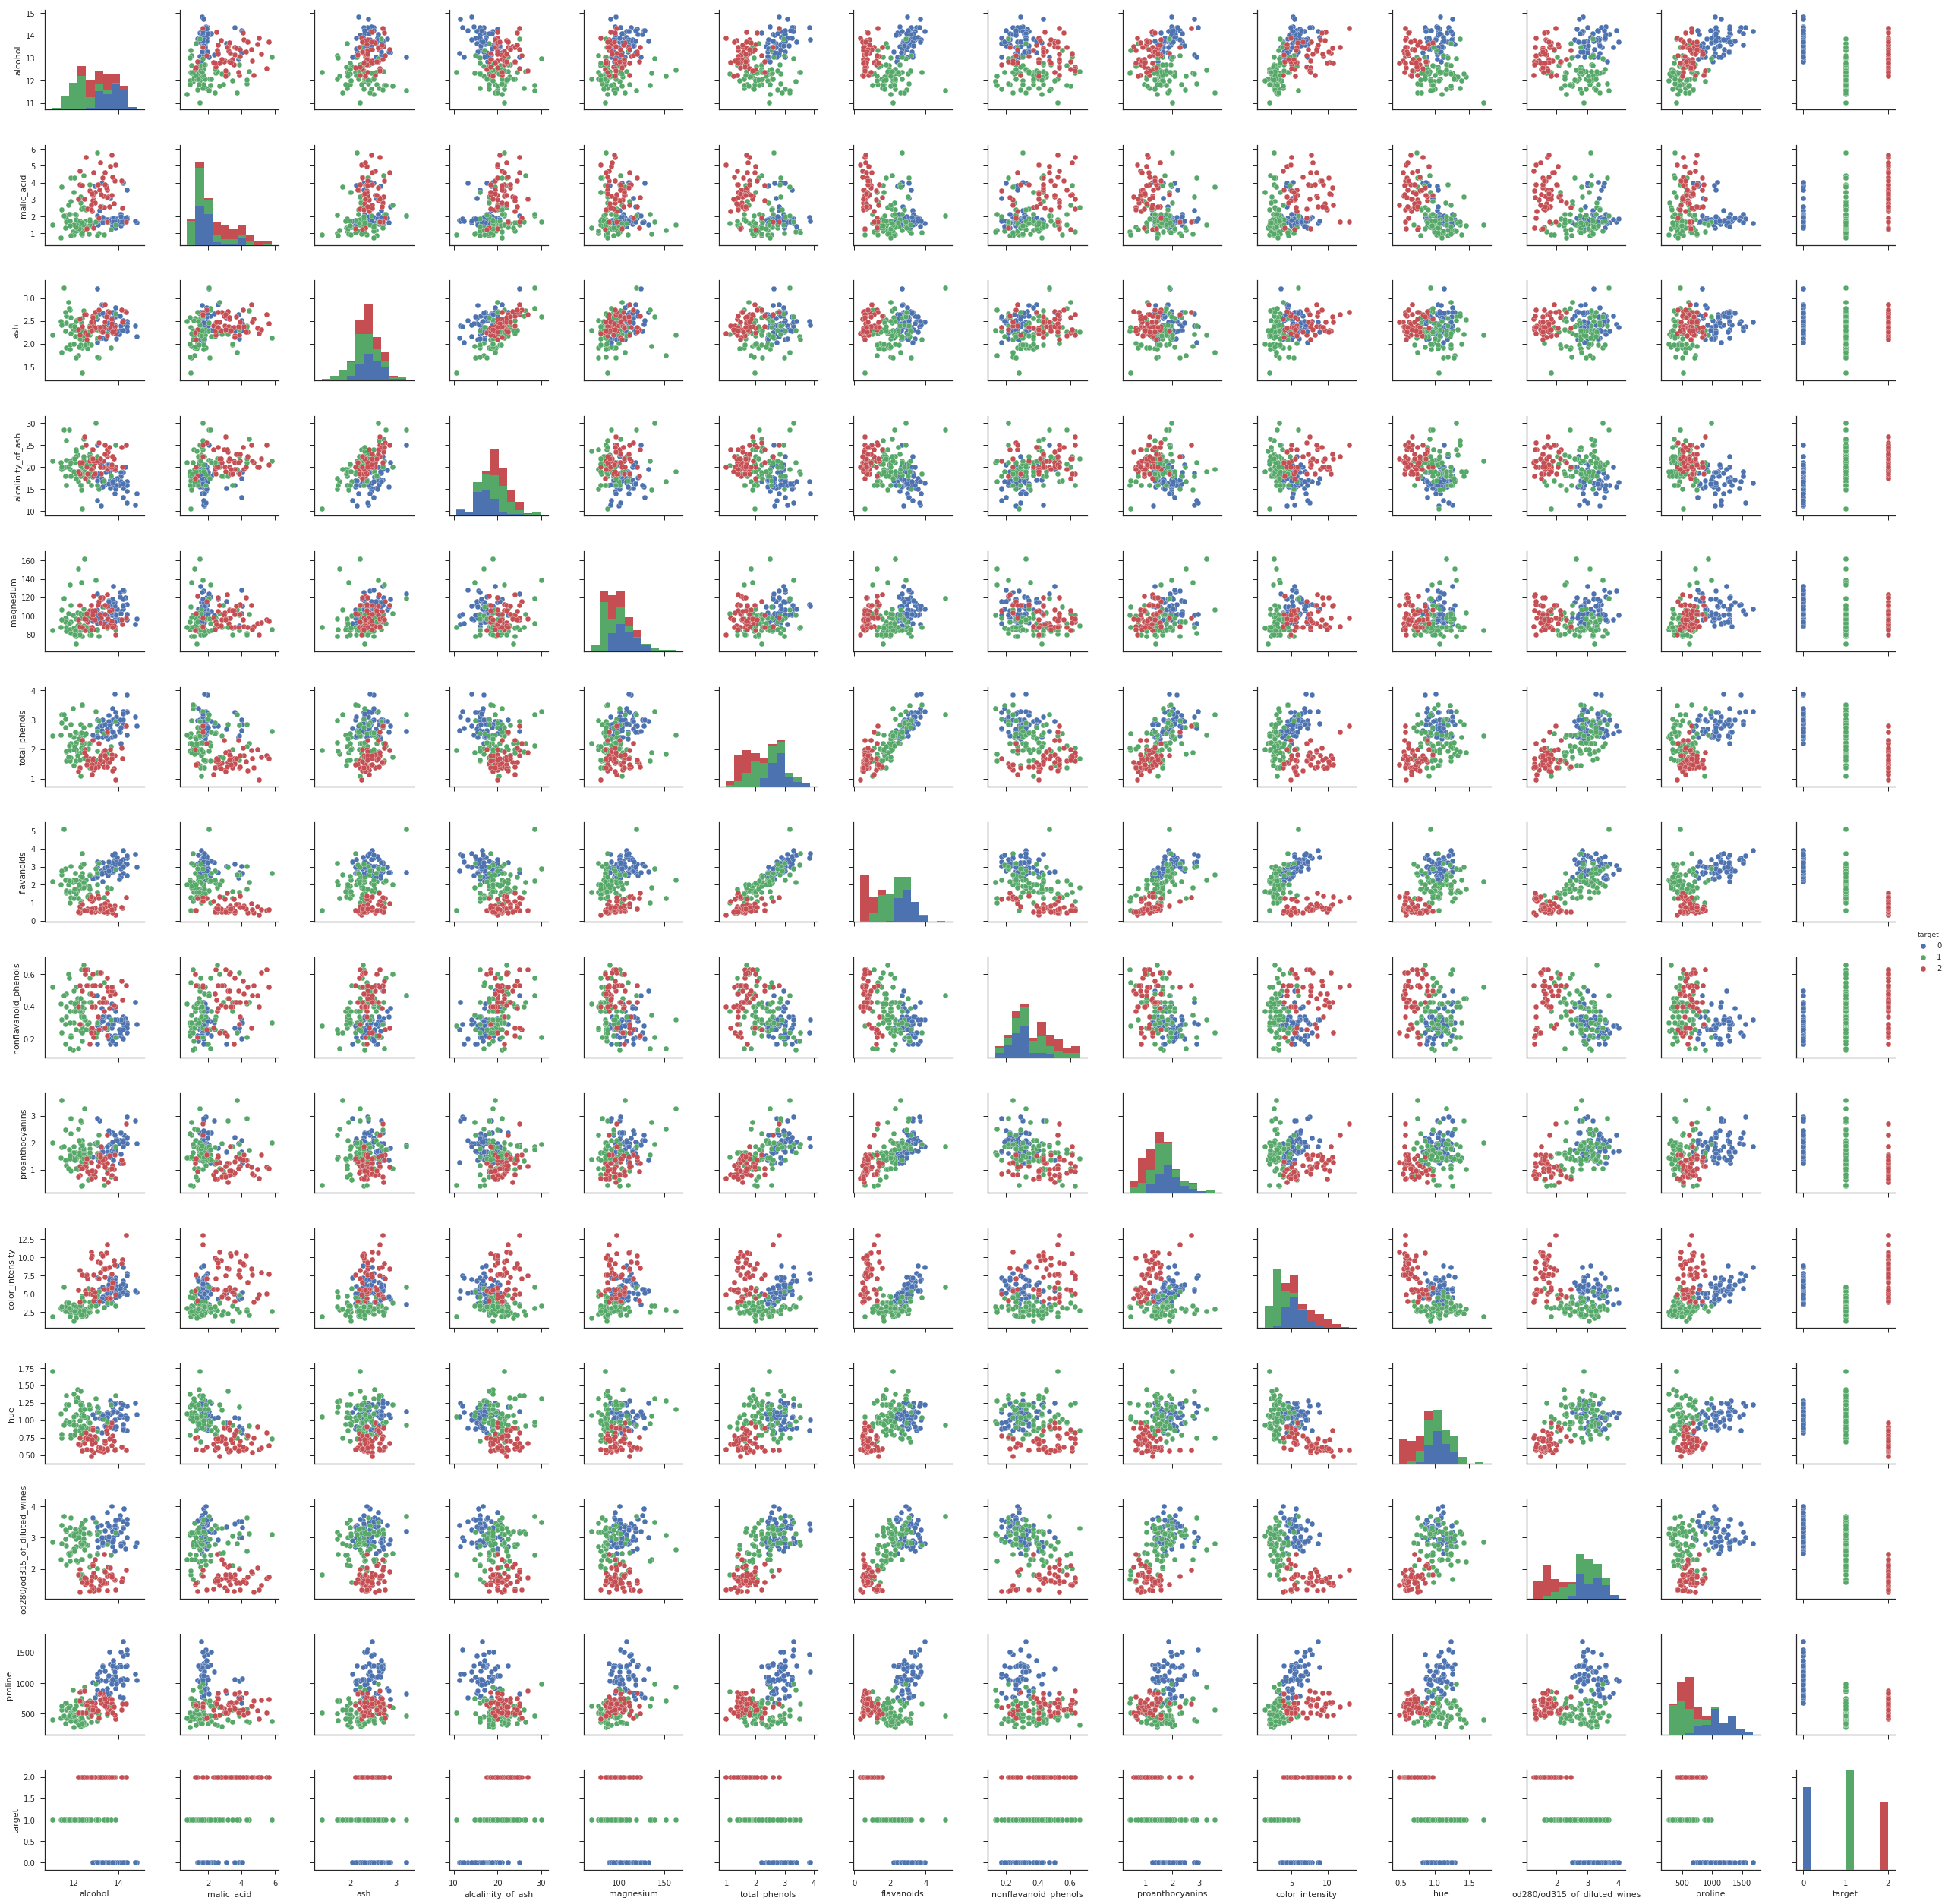

In [13]:
sns.set(style = "ticks")
sns.pairplot(df, hue = "target")
plt.show()

This not of any help.

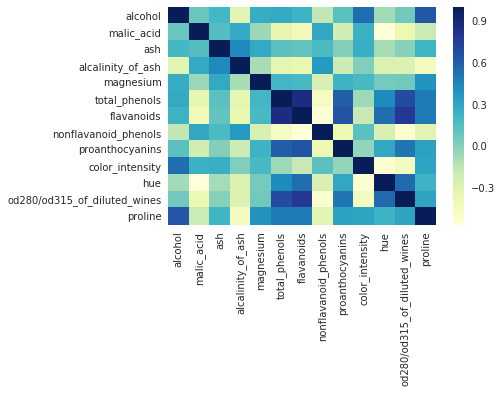

In [17]:
sns.set()
sns.heatmap(df1.corr(), cmap="YlGnBu")
plt.show()

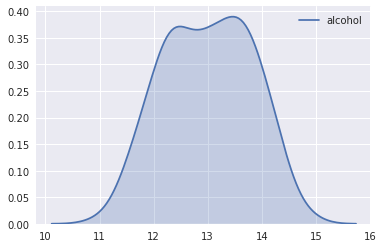

In [15]:
sns.kdeplot(df1['alcohol'], shade = True)

<function matplotlib.pyplot.show(*args, **kw)>

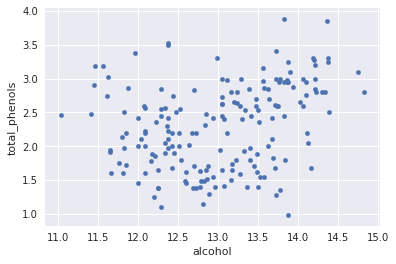

In [16]:
df.plot.scatter(x = 'alcohol',y = 'total_phenols')
plt.show

The data is not very clean but it can be classified.

## Splitting the data into training, cross validation and testing dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, df2, train_size = 0.6,test_size = 0.4, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size = 0.5, test_size = 0.5, random_state = 1)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print (X_val.shape, y_val.shape)

(106, 13) (106, 1)
(36, 13) (36, 1)
(36, 13) (36, 1)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

The data is scaled to make it more evenly distributed.

## Training and Testing (Different Models)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train.values.ravel())

knn_score = knn.score(X_val, y_val)

In [22]:
from sklearn import svm
svc = svm.SVC(C = 1000, gamma = 'scale')
svc.fit(X_train,y_train.values.ravel())

svm_score = svc.score(X_val, y_val)

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=[10],max_iter=2000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())

mlp_score = mlp.score(X_val, y_val)

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train.values.ravel())

gnb_score = gnb.score(X_val, y_val)

In [25]:
models = pd.DataFrame({'Model': ['KNN','SVC','Naive Bayes','MLP'],
    'Score': [knn_score, svm_score, gnb_score, mlp_score]})
print(models.sort_values(by ='Score', ascending = False))

         Model     Score
1          SVC  1.000000
2  Naive Bayes  1.000000
3          MLP  0.972222
0          KNN  0.916667


## Tuning and analyzing the selected model

/home/anchit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 85 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


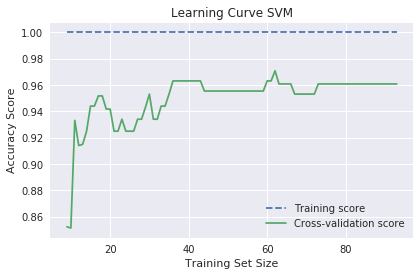

In [26]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C = 1000, gamma = 'scale'), 
                                                        X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1,
                                                        train_sizes=np.linspace(0.1,1, 100))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

/home/anchit/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 85 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


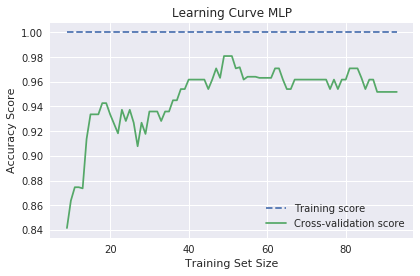

In [27]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(hidden_layer_sizes=[10],max_iter=2000, random_state=42), 
                                                        X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1,
                                                        train_sizes=np.linspace(0.1,1, 100))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve MLP")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Final Step

From curve it is very difficult to select from SVM and MLP. Therefore full classification report is to studied.

In [36]:
from sklearn import svm
svc = svm.SVC(C = 1000, gamma ='scale')
svc.fit(X_train, y_train.values.ravel())

svc_score = svc.score(X_test, y_test)
print(svc_score*100)

from sklearn.metrics import confusion_matrix, classification_report
svc_predict = svc.predict(X_test)
print(classification_report(y_test,svc_predict))

97.22222222222221
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [37]:
mlp = MLPClassifier(hidden_layer_sizes=[10],max_iter=2000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())

mlp_score = mlp.score(X_test, y_test)
print(mlp_score*100)

from sklearn.metrics import confusion_matrix, classification_report
mlp_predict = mlp.predict(X_test)
print(classification_report(y_test,mlp_predict))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [39]:
print(confusion_matrix(y_test, mlp_predict))

[[12  0  0]
 [ 0 11  0]
 [ 0  0 13]]


Score is 100% accuracy with MLP